In [8]:

import pylab as plt
import numpy as np
import matplotlib.colors
from matplotlib._cm import datad
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr 

In [2]:
def plot_traj(data, color='black', size=5, alpha=1):

    """
    Plots the trajectories given a certain basemap.
    Used to avoid redefining the basemap in the drawing of
    movies.

    :param xarray data: Input dataset
    :param str color: Color used in the scatter plot
    :param int size: Size points
    :param float alpha: Transparency (1=full, 0=transparent)

    .. todo::
        Adding the possibility to use a numpy array instead of a string.
        Idea: add the variable in the data array and then keep going

    """

    # number of drifts and time steps
    ndrift = data.dims['drifter']
    ntime = data.dims['time']

    # add the colorbar
    addcbar = True

    # if the color value is not in the dataset.
    # no drawing of cbar (since all is black)
    if not(color in data.keys()):
        addcbar = False
        # default scatter value
        cvalue = color
        cmapname = None

    else:
        cmapname = plt.rcParams['image.cmap']
        cvalue = data[color].values
        # if one dimensional
        if cvalue.ndim == 1:
            # if time dimension, reshape to (ntime, ndrift)
            if cvalue.shape[0] == ntime:
                cvalue = np.tile(cvalue, (ndrift, 1)).T
            # if drift dimension, reshape to (ntime, ndrift)
            elif cvalue.shape[0] == ndrift:
                cvalue = np.tile(cvalue, (ntime, 1))

        # if 2 dimensional
        elif cvalue.ndim == 2:
            if not((cvalue.shape[1] == ndrift) & (cvalue.shape[0] == ntime)):
                 # if not of dimension (ntime, ndrift)
                if (cvalue.shape[0] == ndrift) & (cvalue.shape[1] == ntime):
                    # transpose the data if proper dimensions
                    cvalue = cvalue.shape
                else:
                    # dimensions are not good => everything drawn in black
                    cvalue = 'black'
                    addcbar = False
                    cmapname = None

    # extracts the map coordinates coordinates
    x, y = data['lon'].values, data['lat'].values

    # if drifter defines the colormap, then we create a
    # discrete colormap
    if color == 'drifter':

        # recover the drifter values and stride
        drifter = data[color].values
        dstride = drifter[1] - drifter[0]
        ncolors = len(drifter)

        # defines the colorbar boundaries
        boundaries = [0.5*(drifter[i]+drifter[i+1]) for i in range(0, ncolors-1)]
        boundaries = [drifter[0] - dstride/2.] + boundaries + [drifter[-1] + dstride/2.]

        # creation of the normalisation
        norm = matplotlib.colors.BoundaryNorm(boundaries, ncolors=ncolors)

        # extraction of the colormap from the dictionnary and
        # creation of the discrete colormap
        if cmapname in datad.keys():
            dictout = datad[cmapname]
        else:
            dictout = datad['jet']
        cmap = LinearSegmentedColormap('', dictout, N=ncolors)

        # draws the scatter plot
        cs = plt.scatter(x, y, c=cvalue, s=size, marker='o', edgecolors='none', norm=norm, cmap=cmap, alpha=alpha, transform=ccrs.PlateCarree())

        # add the colorbar
        cb = plt.colorbar(cs, orientation='horizontal')
        cb.set_label(color)

        nmax = 11
        if(len(drifter) > nmax):
            N = np.ceil(len(drifter) / nmax)
            ticks = np.arange(drifter[0], drifter[-1], N*dstride)
        else:
            ticks = drifter

        cb.set_ticks(ticks)

    else:
        # draws the scatter plot
        cs = plt.scatter(x, y, c=cvalue, s=size, marker='o', edgecolors='none', cmap=cmapname, alpha=alpha, transform=ccrs.PlateCarree())

        if addcbar:
            # add the colorbar if necessary
            cb = plt.colorbar(cs, orientation='horizontal')
            cb.set_label(color)


In [3]:
# def map_traj(data, color='black', layout='lines', size=5):

#     """
#     Draws the Ichthyop trajectories on a map.

#     :param xarray.Dataset data: Input dataset
#     :param str color: Name of the variable used to
#      color trajectories ('drifter', 'time', 'depth', etc).
#     :param str layout: Map layout ('filled' for filled continents, 'etopo'
#      for ETOPO map background, 'lines' for coastlines).
#     :param int size: Size of the dots in the scatter plot
#     :param dict projection: Cartopy Projection (crs object). If None, PlateCarree()

#     """

#     ax = plt.gca()

#     # number of drifts and time steps
#     ndrift = data.dims['drifter']
#     ntime = data.dims['time']

#     if(ndrift==ntime):
#         message = "Warning: the number of time steps is the same as the number of drifters. "
#         message += "Consequently, all 1D variables will be considered as depending on time. "
#         message += "The resulting plot might thus be wrong. Consider changing the number of drifters"
#         print(message)

#     if layout == 'filled':
#         ax.add_feature(cfeature.LAND, color='lightgray')
#         ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
#     elif layout == 'etopo':
#         ax.stock_img()
#     elif layout == 'coastline':
#         ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

#     # plot the trajectory
#     plot_traj(data, color, size)


In [7]:
# def map_traj(data, color='black', layout='lines', size=5):
#     # Create figure with GeoAxes using PlateCarree projection
#     plt.figure(figsize=(10, 6))
#     ax = plt.axes(projection=ccrs.PlateCarree())
    
#     # Add map features based on layout
#     if layout == 'filled':
#         ax.add_feature(cfeature.LAND, color='lightgray')
#         ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
#     elif layout == 'etopo':
#         ax.stock_img()
#     elif layout == 'coastline':
#         ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    
#     # Plot trajectory
#     plot_traj(data, color, size)
    
#     # Set map extent based on data bounds
#     lon_min, lon_max = data.lon.min().item(), data.lon.max().item()
#     lat_min, lat_max = data.lat.min().item(), data.lat.max().item()
#     ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    
#     return ax

In [3]:
traj = xr.open_dataset('roms3d_Apr_ichthyop-run201607201536.nc')

In [5]:
print(traj)

<xarray.Dataset> Size: 30MB
Dimensions:      (time: 51, drifter: 36400, edge: 1120, latlon: 2)
Coordinates:
  * time         (time) float64 408B 1.323e+08 1.323e+08 ... 1.344e+08 1.344e+08
Dimensions without coordinates: drifter, edge, latlon
Data variables:
    lon          (time, drifter) float32 7MB ...
    lat          (time, drifter) float32 7MB ...
    mortality    (time, drifter) int32 7MB ...
    depth        (time, drifter) float32 7MB ...
    region_edge  (edge, latlon) float32 9kB ...
Attributes: (12/60)
    transport_dimension:                    3d
    release.schedule.is_enabled:            false
    release.schedule.events:                "year 01 month 05 day 03 at 00:00...
    app.time.initial_time:                  year 05 month 04 day 02 at 00:00
    app.time.transport_duration:            0025 day(s) 00 hour(s) 00 minute(s)
    app.time.time_step:                     3600
    ...                                     ...
    dataset.roms_3d.field_var_v:            v
 

/tmp/ipykernel_2702582/294786240.py:20: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ndrift = data.dims['drifter']
/tmp/ipykernel_2702582/294786240.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ntime = data.dims['time']


<GeoAxes: >

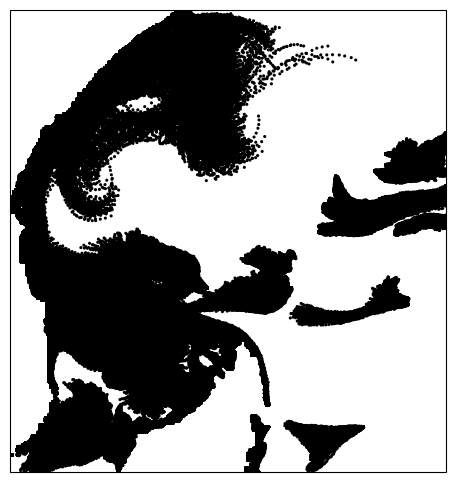

In [8]:
map_traj(traj)

In [9]:
# def map_traj(data, color='black', layout='lines', size=1):
#     plt.figure(figsize=(10, 8))
#     ax = plt.axes(projection=ccrs.PlateCarree())
    
#     # Add gridlines
#     gl = ax.gridlines(draw_labels=True)
#     gl.top_labels = False
#     gl.right_labels = False
    
#     # Add coastlines in black
#     ax.add_feature(cfeature.LAND, color='lightgray')
#     ax.add_feature(cfeature.COASTLINE, linewidth=0.5, color='black')
    
#     # Plot trajectories with smaller points and defined extent
#     plot_traj(data, color='black', size=size)
#     ax.set_extent([35, 60, -20, 5])  # [lon_min, lon_max, lat_min, lat_max]
    
#     return ax

/Users/jiaruizhou/.conda/envs/parcels/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipykernel_2702582/294786240.py:20: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ndrift = data.dims['drifter']
/tmp/ipykernel_2702582/294786240.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ntime = data.dims['time']


<GeoAxes: >

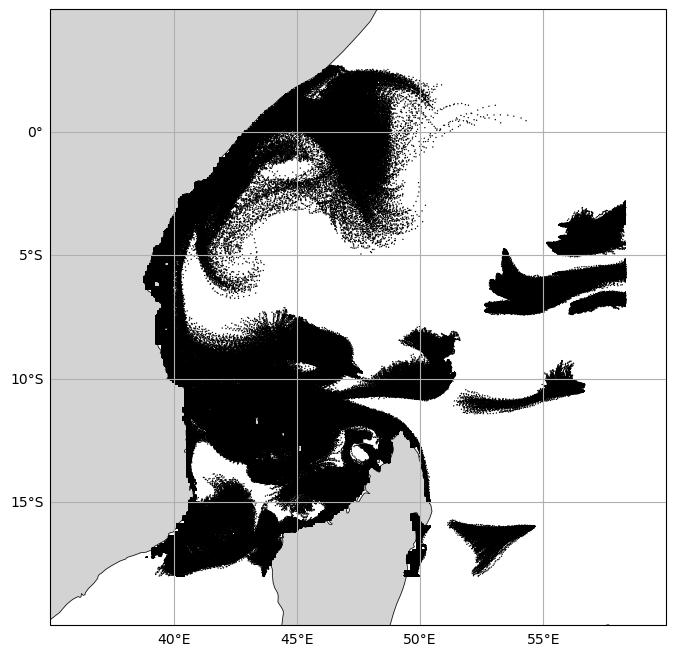

In [10]:
# map_traj(traj)

In [23]:
oct = xr.open_dataset('roms3d_Oct_ichthyop-run201607201624.nc')

/Users/jiaruizhou/.conda/envs/parcels/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipykernel_2702582/294786240.py:20: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ndrift = data.dims['drifter']
/tmp/ipykernel_2702582/294786240.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ntime = data.dims['time']


<GeoAxes: >

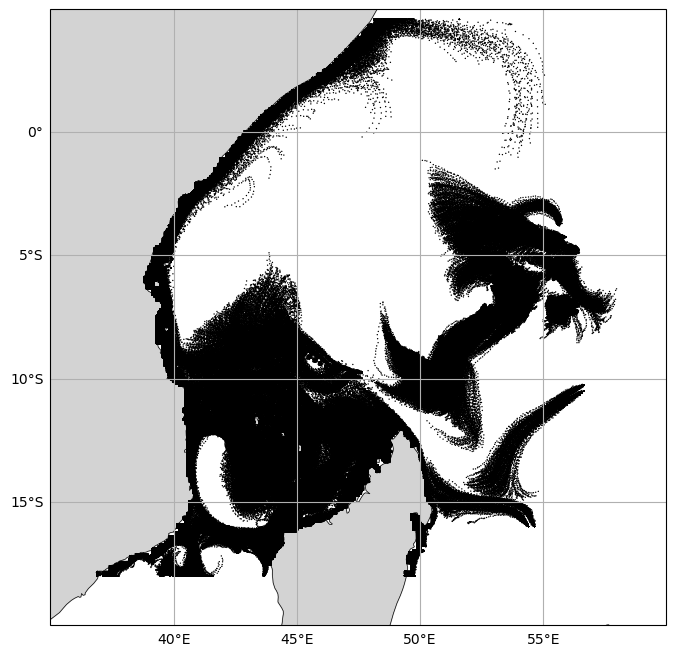

In [12]:
map_traj(oct)

/Users/jiaruizhou/.conda/envs/parcels/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/tmp/ipykernel_2702582/294786240.py:20: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ndrift = data.dims['drifter']
/tmp/ipykernel_2702582/294786240.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ntime = data.dims['time']


<GeoAxes: >

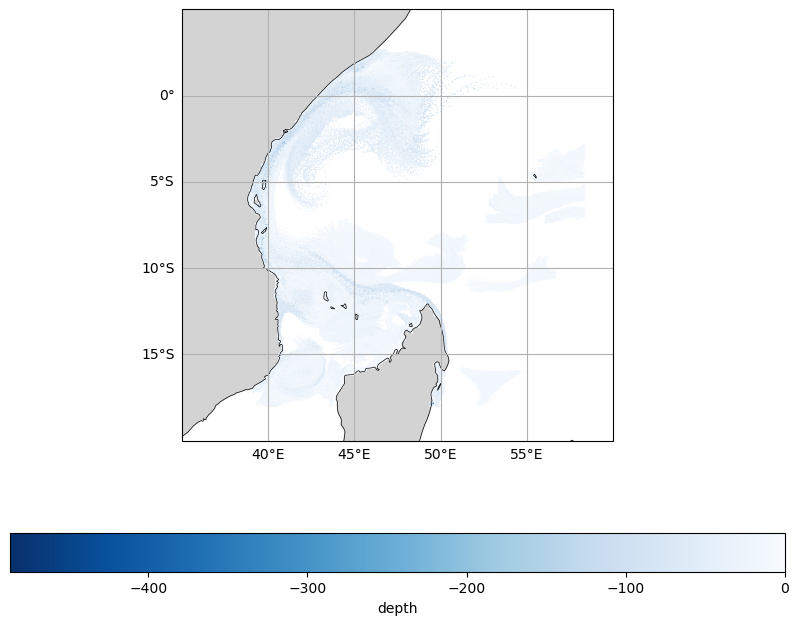

In [13]:
def map_traj(data, color='depth', layout='lines', size=1):
   plt.figure(figsize=(10, 8))
   ax = plt.axes(projection=ccrs.PlateCarree())
   
   gl = ax.gridlines(draw_labels=True)
   gl.top_labels = False 
   gl.right_labels = False
   
   ax.add_feature(cfeature.LAND, color='lightgray')
   ax.add_feature(cfeature.COASTLINE, linewidth=0.5, color='black')
   
   # Use depth for coloring with a blue colormap
   plt.set_cmap('Blues_r')  # Reversed blues colormap
   plot_traj(data, color=color, size=size)
   
   ax.set_extent([35, 60, -20, 5])
   return ax

map_traj(traj, size=0.5, color='depth')

In [30]:
def map_traj(data, color='mortality', layout='lines', size=1):
   plt.figure(figsize=(10, 8))
   ax = plt.axes(projection=ccrs.PlateCarree())
   
   gl = ax.gridlines(draw_labels=True)
   gl.top_labels = False
   gl.right_labels = False
   
   ax.add_feature(cfeature.LAND, color='lightgray')
   ax.add_feature(cfeature.COASTLINE, linewidth=0.5, color='black')
   
   # Use cosmic purple without colorbar
   plt.scatter(data.lon, data.lat, c='#9B7CB9', s=size, alpha=0.1)
   
   ax.set_extent([35, 60, -20, 5])
   return ax

/Users/jiaruizhou/.conda/envs/parcels/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: >

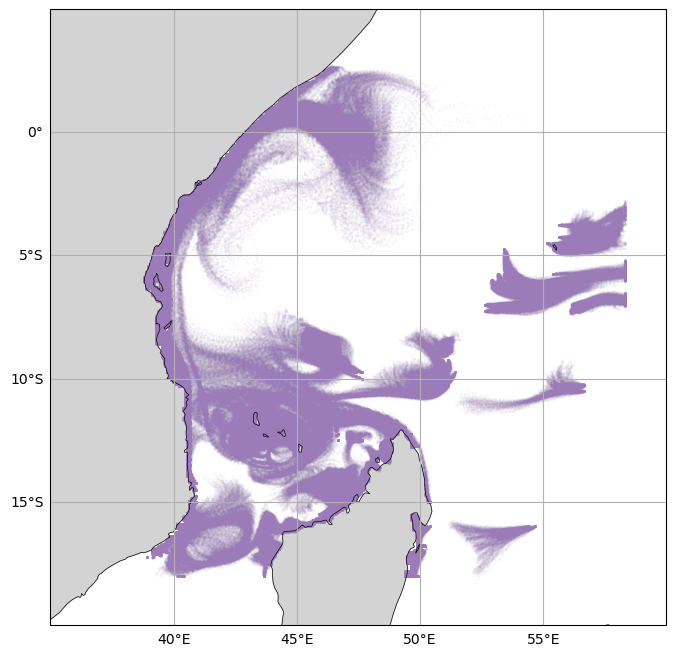

In [34]:
map_traj(traj, size=0.1)

In [35]:
plt.savefig('trajectory_map_apr.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

/Users/jiaruizhou/.conda/envs/parcels/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: >

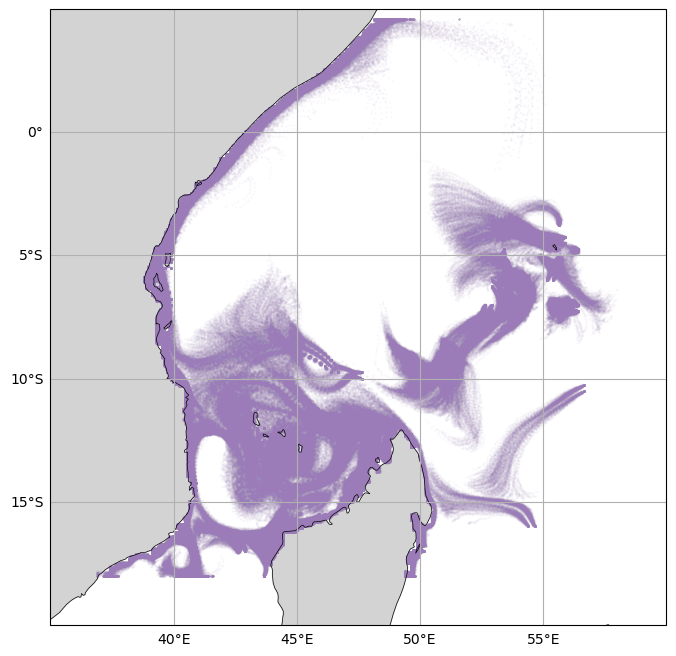

In [31]:
map_traj(oct, size=0.1)

In [32]:
plt.savefig('trajectory_map_oct.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [33]:
import os
print(os.getcwd())

/Users/jiaruizhou/Reeflink/ichthyic-python


In [109]:
import numpy as np
import xarray as xr
from scipy.stats import binned_statistic_2d

def calculate_density_maps(data, bin_size_km=25):
    """
    Calculate larval density and probability maps from particle tracking data.
    
    Parameters:
    data (xarray.Dataset): Dataset with particle tracking results
    bin_size_km (float): Size of spatial bins in kilometers
    
    Returns:
    xarray.Dataset: Dataset containing density and probability maps
    """
    # Convert lat/lon to km (approximate)
    km_per_degree = 111  # rough approximation
    
    # Create spatial bins
    lon_bins = np.arange(data.lon.min(), data.lon.max(), bin_size_km/km_per_degree)
    lat_bins = np.arange(data.lat.min(), data.lat.max(), bin_size_km/km_per_degree)
    
    # Initialize arrays for results
    density_maps = []
    probability_maps = []
    
    # Calculate density for each timestep
    for t in range(data.dims['time']):
        # Get active particles (not dead)
        active = data.mortality.isel(time=t) == 0
        lons = data.lon.isel(time=t).where(active)
        lats = data.lat.isel(time=t).where(active)
        
        # Calculate histogram
        density, _, _, _ = binned_statistic_2d(
            lons.values.flatten(),
            lats.values.flatten(),
            None,
            'count',
            bins=[lon_bins, lat_bins]
        )
        
        # Convert to probability density
        prob_density = density / np.sum(density)
        
        density_maps.append(density)
        probability_maps.append(prob_density)
    
    # Combine into dataset
    result = xr.Dataset(
        {
            'density': (['time', 'lon', 'lat'], np.array(density_maps)),
            'probability': (['time', 'lon', 'lat'], np.array(probability_maps)),
            'cumulative_probability': (['lon', 'lat'], np.mean(probability_maps, axis=0))
        },
        coords={
            'time': data.time,
            'lon': lon_bins[:-1] + np.diff(lon_bins)/2,
            'lat': lat_bins[:-1] + np.diff(lat_bins)/2
        }
    )
    
    return result

def plot_probability_map(data, figname):
    """
    Plot cumulative probability map
    """
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    

    cs = plt.pcolormesh(
        data.lon, 
        data.lat, 
        data.cumulative_probability.T,
        transform=ccrs.PlateCarree(),
        cmap='turbo'
    )
    
    ax.add_feature(cfeature.LAND, color='lightgray', zorder=1)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5, zorder=2)
    ax.gridlines(zorder=3)
    
    country_names = {
        'Tanzania': (38, -6),
        'Kenya': (41, 0),
        'Somalia': (45, 2),
        'Madagascar': (46, -17),
        'Mozambique': (39, -15),
        'Comoros': (43.5, -11),
        'Seychelles': (55, -4)
    }
    
    for country, coords in country_names.items():
        plt.text(coords[0], coords[1], country, 
                transform=ccrs.PlateCarree(),
                fontsize=8, 
                weight='bold',
                ha='center', 
                va='center',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    
    plt.colorbar(cs, label='Particle Density')
    plt.title('Snapshots of Coral Larval Density')
    
    plt.savefig(figname, bbox_inches='tight')
    plt.close()

In [110]:
apr_density = calculate_density_maps(traj, bin_size_km=25)

/tmp/ipykernel_2762501/3888619876.py:28: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for t in range(data.dims['time']):


In [111]:
plot_probability_map(apr_density, 'apr_density.png')

In [112]:
oct = xr.open_dataset('roms3d_Oct_ichthyop-run201607201624.nc')
oct_density = calculate_density_maps(oct, bin_size_km=25)
plot_probability_map(oct_density, 'oct_density.png')

/tmp/ipykernel_2762501/3888619876.py:28: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for t in range(data.dims['time']):


In [113]:
feb = xr.open_dataset('roms3d_Feb_ichthyop-run201607201524.nc')
feb_density = calculate_density_maps(feb, bin_size_km=25)
plot_probability_map(feb_density, 'feb_density.png')

/tmp/ipykernel_2762501/3888619876.py:28: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for t in range(data.dims['time']):


In [114]:
dec = xr.open_dataset('roms3d_Dec_ichthyop-run201607201635.nc')
dec_density = calculate_density_maps(dec, bin_size_km=25)
plot_probability_map(dec_density, 'dec_density.png')

/tmp/ipykernel_2762501/3888619876.py:28: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for t in range(data.dims['time']):
